In [1]:
## import libraries
from xmitgcm import open_mdsdataset
from datetime import datetime
import numpy as np
import xarray as xr
import scipy.interpolate
import math
import os
from matplotlib import pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline

## read data (choose 'sub' or 'frt' to check the subtropical or the extension region)

In [14]:
######## 读取已保存的合成后的数据 ########
# polarity = 'Cycl' ## 'Cycl' or 'Anticycl'
area = 'frt' ## 'frt' or 'sub'
ds0 = xr.open_dataset('/data/home/zhangrd/' + area + '_1y.nc')
dsCE = xr.open_dataset('/data3/home/zhangrd/VorDiag/' + area + 'Cycl_VorDiagCompo.nc')
dsAE = xr.open_dataset('/data3/home/zhangrd/VorDiag/' + area + 'Anticycl_VorDiagCompo.nc')

# sc = xr.open_dataset('/data/home/zhangrd/Data/VorDiag/subCycl_VorDiagCompo.nc')
# sa = xr.open_dataset('/data/home/zhangrd/Data/VorDiag/subAnticycl_VorDiagCompo.nc')
# fc = xr.open_dataset('/data/home/zhangrd/Data/VorDiag/frtCycl_VorDiagCompo.nc')
# fa = xr.open_dataset('/data/home/zhangrd/Data/VorDiag/frtAnticycl_VorDiagCompo.nc')

In [15]:
CEcompo_w = dsCE.wvel
CEcompo_diss_df = dsCE.diss
CEcompo_adv_df = dsCE.adv
CEcompo_cori_df = dsCE.cori
CEcompo_ext_df = dsCE.ext
CEcompo_vvis_df = dsCE.vvis
CEcompo_tend_df = dsCE.trend
CEcompo_betaV_df = dsCE.betaV
CEcompo_dwdz = dsCE.dwdz

AEcompo_w = dsAE.wvel
AEcompo_diss_df = dsAE.diss
AEcompo_adv_df = dsAE.adv
AEcompo_cori_df = dsAE.cori
AEcompo_ext_df = dsAE.ext
AEcompo_vvis_df = dsAE.vvis
AEcompo_tend_df = dsAE.trend
AEcompo_betaV_df = dsAE.betaV
AEcompo_dwdz = dsAE.dwdz

if area == 'sub':
    CEcompo_pres_df = dsCE.pres
    AEcompo_pres_df = dsAE.pres
elif area == 'frt':
    CEcompo_phsur_df = dsCE.phsur
    CEcompo_ph00_df = dsCE.ph00
    CEcompo_pres_df = CEcompo_phsur_df + CEcompo_ph00_df
    
    AEcompo_phsur_df = dsAE.phsur
    AEcompo_ph00_df = dsAE.ph00
    AEcompo_pres_df = AEcompo_phsur_df + AEcompo_ph00_df

### check: Cori = dwdz-betaV（40、112.5、350、750m）

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.grid()
plt.plot(ds.XG, compo_dwdz[3,51,:]-compo_betaV_df[3,51,:], label='dwdz-betaV_f',)
plt.plot(ds.XG, compo_cori_df[3,51,:], label='Cori_df',)
# plt.ylim()
# plt.xlim()
plt.xlabel('')
plt.ylabel('')
plt.title('Cori terms of Cyclonic Eddy in 40 m')
plt.legend()

plt.subplot(4, 1, 2)
plt.grid()
plt.plot(ds.XG, compo_dwdz[6,51,:]-compo_betaV_df[6,51,:], label='dwdz-betaV_f',)
plt.plot(ds.XG, compo_cori_df[6,51,:], label='Cori_df',)
# plt.ylim()
# plt.xlim()
plt.xlabel('')
plt.ylabel('')
plt.title('Cori terms of Cyclonic Eddy in 112.5 m')
plt.legend()

plt.subplot(4, 1, 3)
plt.grid()
plt.plot(ds.XG, compo_dwdz[11,51,:]-compo_betaV_df[11,51,:], label='dwdz-betaV_f',)
plt.plot(ds.XG, compo_cori_df[11,51,:], label='Cori_df',)
# plt.ylim()
# plt.xlim()
plt.xlabel('')
plt.ylabel('')
plt.title('Cori terms of Cyclonic Eddy in 350 m')
plt.legend()

plt.subplot(4, 1, 4)
plt.grid()
plt.plot(ds.XG, compo_dwdz[15,51,:]-compo_betaV_df[15,51,:], label='dwdz-betaV_f',)
plt.plot(ds.XG, compo_cori_df[15,51,:], label='Cori_df',)
# plt.ylim()
# plt.xlim()
plt.xlabel('')
plt.ylabel('')
plt.title('Cori terms of Cyclonic Eddy in 750 m')
plt.legend()

# dsvename = 'dwdz-betaV_350m.png'
# plt.dsvefig('/data/home/zhangrd/Pictures/compoCS_Vor+w/'+dsvename,dpi=300)

### check tota

In [16]:
CEcompo_tot_df = CEcompo_dwdz-CEcompo_betaV_df+CEcompo_diss_df+CEcompo_adv_df+CEcompo_pres_df+CEcompo_ext_df+CEcompo_vvis_df-CEcompo_tend_df
AEcompo_tot_df = AEcompo_dwdz-AEcompo_betaV_df+AEcompo_diss_df+AEcompo_adv_df+AEcompo_pres_df+AEcompo_ext_df+AEcompo_vvis_df-AEcompo_tend_df

In [17]:
######## 0-450m ########
##CE
CEdiss_integrate  = (CEcompo_diss_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEadv_integrate   = (CEcompo_adv_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEcori_integrate  = (CEcompo_cori_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEext_integrate   = (CEcompo_ext_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEvvis_integrate  = (CEcompo_vvis_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEtend_integrate  = (CEcompo_tend_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEbetaV_integrate = (CEcompo_betaV_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEdwdz_integrate  = (CEcompo_dwdz[:13]*-ds0.drF[:13]).sum(dim='Z')
CEpres_integrate  = (CEcompo_pres_df[:13]*-ds0.drF[:13]).sum(dim='Z')
CEtot_integrate   = (CEcompo_tot_df[:13]*-ds0.drF[:13]).sum(dim='Z')
##AE
AEdiss_integrate  = (AEcompo_diss_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEadv_integrate   = (AEcompo_adv_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEcori_integrate  = (AEcompo_cori_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEext_integrate   = (AEcompo_ext_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEvvis_integrate  = (AEcompo_vvis_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEtend_integrate  = (AEcompo_tend_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEbetaV_integrate = (AEcompo_betaV_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEdwdz_integrate  = (AEcompo_dwdz[:13]*-ds0.drF[:13]).sum(dim='Z')
AEpres_integrate  = (AEcompo_pres_df[:13]*-ds0.drF[:13]).sum(dim='Z')
AEtot_integrate   = (AEcompo_tot_df[:13]*-ds0.drF[:13]).sum(dim='Z')

In [18]:
##### CE
CEw_ext = CEdiss_integrate*(-1) +CEpres_integrate*(-1) +CEext_integrate*(-1) +CEvvis_integrate*(-1) # ext项合并
CEw_materialrate = CEtend_integrate +CEadv_integrate[51,:]*(-1) # tend和(adv+tilt)项合并
#计算合并后的 各项/w 的比值(做横柱图用)
CEtend_w    = CEtend_integrate/CEdwdz_integrate
CEadvTilt_w = CEadv_integrate*(-1)/CEdwdz_integrate
CEsum_w     = CEw_materialrate/CEdwdz_integrate
CEbetaV_w   = CEbetaV_integrate/CEdwdz_integrate
CEext_w     = CEw_ext/CEdwdz_integrate
CEbar_tend    = np.mean(CEtend_w[51,1:])    # SCE:-8.78672761
CEbar_advTilt = np.mean(CEadvTilt_w[51,1:]) # SCE: 7.518855
CEbar_sum     = np.mean(CEsum_w[51,1:])     # SCE:-1.26787262
CEbar_betaV   = np.mean(CEbetaV_w[51,1:])   # SCE: 2.1833556
CEbar_ext     = np.mean(CEext_w[51,1:])     # SCE:-0.01546205

##### AE
AEw_ext = AEdiss_integrate*(-1) +AEpres_integrate*(-1) +AEext_integrate*(-1) +AEvvis_integrate*(-1)
AEw_materialrate = AEtend_integrate +AEadv_integrate[51,:]*(-1)
#计算合并后的 各项/w 的比值(做横柱图用)
AEtend_w    = AEtend_integrate/AEdwdz_integrate
AEadvTilt_w = AEadv_integrate*(-1)/AEdwdz_integrate
AEsum_w     = AEw_materialrate/AEdwdz_integrate
AEbetaV_w   = AEbetaV_integrate/AEdwdz_integrate
AEext_w     = AEw_ext/AEdwdz_integrate
AEbar_tend    = np.mean(AEtend_w[51,1:])    # SAE:-8.78672761
AEbar_advTilt = np.mean(AEadvTilt_w[51,1:]) # SAE: 7.518855
AEbar_sum     = np.mean(AEsum_w[51,1:])     # SAE:-1.26787262
AEbar_betaV   = np.mean(AEbetaV_w[51,1:])   # SAE: 2.1833556
AEbar_ext     = np.mean(AEext_w[51,1:])     # SAE:-0.01546205

/data/home/zhangrd/.conda/envs/geo_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


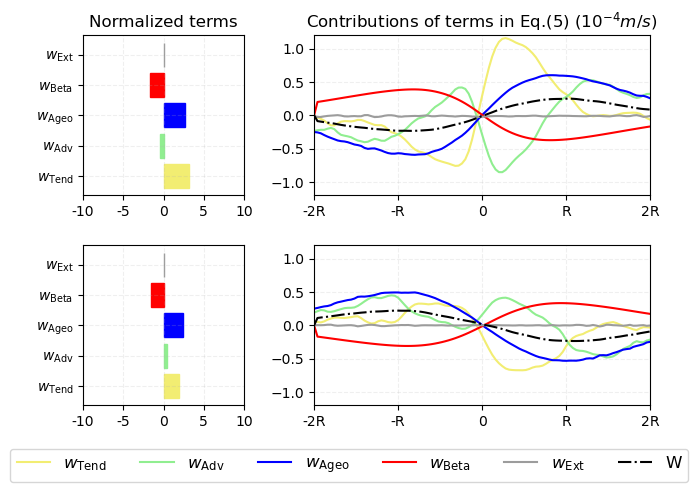

In [20]:
pos1=[0.12,0.59,0.23,0.32]
pos2=[0.45,0.59,0.48,0.32]
pos3=[0.12,0.17,0.23,0.32]
pos4=[0.45,0.17,0.48,0.32]

fig = plt.figure(figsize=(7, 5))
## 子图1，CE在450m的横向柱状图
ax1=plt.axes(pos1)
terms = [r'$w_{\mathrm{Tend}}$', r'$w_{\mathrm{Adv}}$', r'$w_{\mathrm{Ageo}}$', r'$w_{\mathrm{Beta}}$', r'$w_{\mathrm{Ext}}$']
values= [CEbar_tend, CEbar_advTilt, CEbar_sum, CEbar_betaV, CEbar_ext]
colors= ['#F2ED72', 'lightgreen', 'b', 'r', '#9C9C9C'] #'#bbd1ed', '#bbd1ed', '#00b1a7', '#f5b46f', '#354e97'
bars = ax1.barh(terms, values, color=colors, edgecolor=colors, linewidth=1.) #绘制bar
# bars[0].set_linestyle('--')  # 第一个bar：轮廓线虚线
# bars[1].set_linestyle(':')   # 第二个bar：轮廓线点线
ax1.set_title('Normalized terms', loc='center', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.2)
ax1.set_xlim(-10,10)
ax1.set_xlabel('', fontsize=12)
ax1.set_xticks([-10,-5,0,5,10])
ax1.set_xticklabels(('-10','-5','0','5','10'))
ax1.set_ylabel('', fontsize=12)
# ax1.set_yticklabels(('','','','',''), fontweight='bold')

## 子图2，CE在0-450m深度上积分
ax2=plt.axes(pos2)
ax2.plot(dsCE.XG, CEtend_integrate[51,:]*1e4     , color='#F2ED72', label=r'$w_{\mathrm{Tend}}$',)
ax2.plot(dsCE.XG, CEadv_integrate[51,:]*(-1)*1e4 , color='lightgreen', label=r'$w_{\mathrm{Adv}}$',)
ax2.plot(dsCE.XG, CEw_materialrate[51,:]*1e4     , color='b', label=r'$w_{\mathrm{Ageo}}$',) #'.'
ax2.plot(dsCE.XG, CEbetaV_integrate[51,:]*1e4    , color='r', label=r'$w_{\mathrm{Beta}}$',) #'.'
ax2.plot(dsCE.XG, CEw_ext[51,:]*1e4              , color='#9C9C9C', label=r'$w_{\mathrm{Ext}}$',) #'.'
ax2.plot(dsCE.XG, CEdwdz_integrate[51,:]*1e4     ,'-.' , color='k', label='W', markersize=3,)
# ax2.plot(ds.XG, CEtot_integrate[51,:]*(-1), label='total',)
ax2.set_title('Contributions of terms in Eq.(5) ($ 10^{-4} m/s$)', loc='center', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0)) #设置 y 轴刻度为科学计数法
# ax2.set_ylim(-2,2) # sub ylim
ax2.set_ylim(-1.2,1.2) # frt ylim
ax2.set_xlim(-2,2)
ticks  = [-2,-1,0,1,2]
tlabels= ['-2R','-R','0','R','2R']
ax2.set_xticks(ticks)
# ax2.set_yticks(ticks)
ax2.set_xticklabels(tlabels)
# ax2.set_yticklabels(tlabels)
# ystart, yend = ax2.get_ylim()

## 子图3，AE在450m的横向柱状图
ax3=plt.axes(pos3)
terms = [r'$w_{\mathrm{Tend}}$', r'$w_{\mathrm{Adv}}$', r'$w_{\mathrm{Ageo}}$', r'$w_{\mathrm{Beta}}$', r'$w_{\mathrm{Ext}}$']
values= [AEbar_tend, AEbar_advTilt, AEbar_sum, AEbar_betaV, AEbar_ext]
colors= ['#F2ED72', 'lightgreen', 'b', 'r', '#9C9C9C']
bars = ax3.barh(terms, values, color=colors, edgecolor=colors, linewidth=1.) #绘制bar
# bars[0].set_linestyle('--')  # 第一个bar：轮廓线虚线
# bars[1].set_linestyle(':')   # 第二个bar：轮廓线点线
ax3.set_title('', loc='left', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.2)
ax3.set_xlim(-10,10)
ax3.set_xlabel('', fontsize=12)
ax3.set_xticks([-10,-5,0,5,10])
ax3.set_xticklabels(('-10','-5','0','5','10'))
ax3.set_ylabel('', fontsize=12)
# ax3.set_yticklabels(('','','','',''), fontweight='bold')

## 子图4，AE在0-450m深度上积分
ax4=plt.axes(pos4)
ax4.plot(dsAE.XG, AEtend_integrate[51,:]*1e4     , color='#F2ED72', label=r'$w_{\mathrm{Tend}}$',)
ax4.plot(dsAE.XG, AEadv_integrate[51,:]*(-1)*1e4 , color='lightgreen', label=r'$w_{\mathrm{Adv}}$',)
ax4.plot(dsAE.XG, AEw_materialrate[51,:]*1e4     , color='b', label=r'$w_{\mathrm{Ageo}}$',) #'.'
ax4.plot(dsAE.XG, AEbetaV_integrate[51,:]*1e4    , color='r', label=r'$w_{\mathrm{Beta}}$',) #'.'
ax4.plot(dsAE.XG, AEw_ext[51,:]*1e4              , color='#9C9C9C', label=r'$w_{\mathrm{Ext}}$',) #'.'
ax4.plot(dsAE.XG, AEdwdz_integrate[51,:]*1e4     ,'-.' , color='k', label='W', markersize=3,)
# ax4.plot(ds.XG, AEtot_integrate[51,:]*(-1), label='∫total',)
ax4.set_title('', loc='left', fontsize=12)
ax4.grid(True, linestyle='--', alpha=0.2)
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0, 0)) #设置 y 轴刻度为科学计数法
# ax4.set_ylim(-2,2) # sub ylim
ax4.set_ylim(-1.2,1.2) # frt ylim
ax4.set_xlim(-2,2)
# ystart, yend = ax4.get_ylim()
ax4.set_xticks(ticks)
# ax4.set_yticks(ticks)
ax4.set_xticklabels(tlabels)
# ax4.set_yticklabels(tlabels)


handles, labels = ax4.get_legend_handles_labels() # 在整张图片正下方添加图例
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, fontsize=12)

plt.tight_layout() #优化布局
# 保存图片
savePath = '/data/home/zhangrd/Pictures/1y_snapGIF/'
if area == 'sub':
    saveName = 'fig6.png'
elif area == 'frt':
    saveName = 'fig7.png'

fp0 = os.path.exists(savePath)
if not fp0:
    os.makedirs(savePath)
plt.savefig(savePath + saveName, dpi=300)
# # plt.close()